<a href="https://colab.research.google.com/github/Jalapinho1/Deep-Reinforcement-Learning-Explained/blob/main/DRL_CartpoleEnv_Rlib_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Installing all the dependences
!pip uninstall -y pyarrow  > /dev/null
#!pip install ray[debug]==0.7.5  > /dev/null 2>&1
! pip install -U ray[rllib] &> /dev/null
!pip install bs4  > /dev/null 2>&1

import os
os._exit(0)

In [1]:
import gym
import numpy as np
from matplotlib import pyplot as plt

env = gym.make('CartPole-v0')

import gym
import ray

from ray.rllib.agents.ppo import PPOTrainer, DEFAULT_CONFIG

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# Configuration image rendering in colab

# Taken from https://towardsdatascience.com/rendering-openai-gym-envs-on-binder-and-google-colab-536f99391cc7

!apt-get install -y xvfb x11-utils &> /dev/null
!pip install pyvirtualdisplay==0.2.*  PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.* &> /dev/null
!pip install gym[box2d]==0.17.* &> /dev/null

# Taken from https://github.com/actions/virtual-environments/issues/214
!sudo apt-get update  &> /dev/null 
!sudo apt-get install xvfb --fix-missing &> /dev/null

import pyvirtualdisplay

_display = pyvirtualdisplay.Display(visible=False, size=(1400, 900))
_ = _display.start()

!echo $DISPLAY # sanity checking: should be set to some value (e.g. 1005)

from IPython import display

:1005


In [3]:
ray.init()

2021-01-07 22:16:29,109	INFO services.py:1173 -- View the Ray dashboard at http://127.0.0.1:8265


{'metrics_export_port': 49946,
 'node_id': '0d04d56eb62125e90347411309215f1d2ed88aff',
 'node_ip_address': '172.28.0.2',
 'object_store_address': '/tmp/ray/session_2021-01-07_22-16-28_551626_3844/sockets/plasma_store',
 'raylet_ip_address': '172.28.0.2',
 'raylet_socket_name': '/tmp/ray/session_2021-01-07_22-16-28_551626_3844/sockets/raylet',
 'redis_address': '172.28.0.2:6379',
 'session_dir': '/tmp/ray/session_2021-01-07_22-16-28_551626_3844',
 'webui_url': '127.0.0.1:8265'}

In [4]:
config = DEFAULT_CONFIG.copy()
config["num_gpus"] = 1 # in order to use the GPU

agentPPO = PPOTrainer(config, 'CartPole-v0')

2021-01-07 22:16:34,576	INFO trainer.py:591 -- Tip: set framework=tfe or the --eager flag to enable TensorFlow eager execution
2021-01-07 22:16:34,577	INFO trainer.py:618 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(pid=4728) WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/compat/v2_compat.py:96: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=4728) Instructions for updating:
(pid=4728) non-resource variables are not supported in the long term
(pid=4729) WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/compat/v2_compat.py:96: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=4729) Instructions for updating:
(pid=4729) non-resource variables are not supported in the long term
2021-01-07 22:16

In [6]:
print(DEFAULT_CONFIG)

{'num_workers': 2, 'num_envs_per_worker': 1, 'create_env_on_driver': False, 'rollout_fragment_length': 200, 'batch_mode': 'truncate_episodes', 'num_gpus': 0, 'train_batch_size': 4000, 'model': {'fcnet_hiddens': [256, 256], 'fcnet_activation': 'tanh', 'conv_filters': None, 'conv_activation': 'relu', 'free_log_std': False, 'no_final_linear': False, 'vf_share_layers': True, 'use_lstm': False, 'max_seq_len': 20, 'lstm_cell_size': 256, 'lstm_use_prev_action': False, 'lstm_use_prev_reward': False, '_time_major': False, 'framestack': True, 'dim': 84, 'grayscale': False, 'zero_mean': True, 'custom_model': None, 'custom_model_config': {}, 'custom_action_dist': None, 'custom_preprocessor': None, 'lstm_use_prev_action_reward': -1}, 'optimizer': {}, 'gamma': 0.99, 'horizon': None, 'soft_horizon': False, 'no_done_at_end': False, 'env_config': {}, 'env': None, 'normalize_actions': False, 'clip_rewards': None, 'clip_actions': True, 'preprocessor_pref': 'deepmind', 'lr': 5e-05, 'monitor': False, 'log_

Reward: 10.0


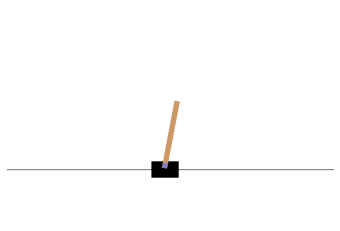

In [5]:
def watch_agent(agent, env):
  state = env.reset()
  rewards = []
  img = plt.imshow(env.render(mode='rgb_array'))
  for t in range(2000):
    action=agent.compute_action(state)

    img.set_data(env.render(mode='rgb_array')) 
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)

    state, reward, done, _ = env.step(action)
    rewards.append(reward)
    if done:
        print("Reward:", sum([r for r in rewards]))
        break 
  env.close()

watch_agent(agentPPO, env)

Train

In [6]:
for i in range(10):
  result = agentPPO.train()
  print(f'Mean reward: {result["episode_reward_mean"]:4.1f}')

(pid=4729) 2021-01-07 22:16:55,615	WARNING deprecation.py:30 -- DeprecationWarning: `env_index` has been deprecated. Use `episode.env_id` instead. This will raise an error in the future!


Instructions for updating:
Prefer Variable.assign which has equivalent behavior in 2.X.


(pid=4728) WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/ray/rllib/policy/tf_policy.py:852: Variable.load (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
(pid=4728) Instructions for updating:
(pid=4728) Prefer Variable.assign which has equivalent behavior in 2.X.
(pid=4729) WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/ray/rllib/policy/tf_policy.py:852: Variable.load (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
(pid=4729) Instructions for updating:
(pid=4729) Prefer Variable.assign which has equivalent behavior in 2.X.


Mean reward: 23.2
Mean reward: 42.3
Mean reward: 65.8
Mean reward: 95.2
Mean reward: 125.8
Mean reward: 148.6
Mean reward: 169.0
Mean reward: 182.1
Mean reward: 187.8
Mean reward: 191.8


After training

Reward: 200.0


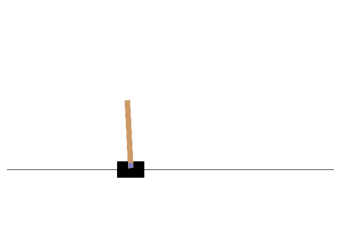

In [7]:
watch_agent(agentPPO, env)

**Training using DQN**


Reward: 31.0


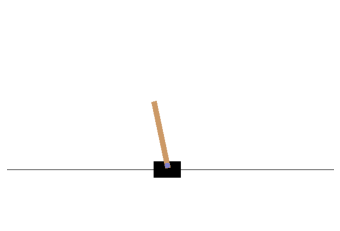

In [16]:
from ray.rllib.agents.dqn import DQNTrainer, DEFAULT_CONFIG
config = DEFAULT_CONFIG.copy()
config["num_gpus"] = 1 # in order to use the GPU
agentDQN = DQNTrainer(config=config, env='CartPole-v0')

watch_agent(agentDQN, env)

In [17]:
for i in range(20):
  result = agentDQN.train()
  print(f'Mean reward: {result["episode_reward_mean"]:4.1f}')

Mean reward: 19.8
Mean reward: 19.6
Mean reward: 22.1
Mean reward: 27.5
Mean reward: 33.8
Mean reward: 41.4
Mean reward: 50.9
Mean reward: 58.8
Mean reward: 68.7
Mean reward: 75.8
Mean reward: 84.7
Mean reward: 91.9
Mean reward: 100.2
Mean reward: 109.4
Mean reward: 117.0
Mean reward: 122.8
Mean reward: 128.2
Mean reward: 133.2
Mean reward: 137.7
Mean reward: 144.4


Reward: 140.0


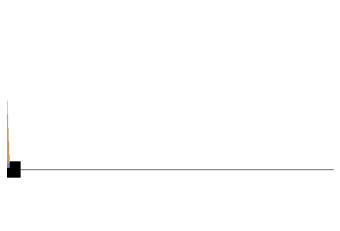

In [18]:
watch_agent(agentDQN, env)

**Training with clasic Policy Gradient**

Reward: 26.0


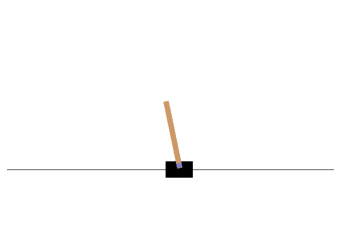

In [13]:
from ray.rllib.agents.pg import PGTrainer, DEFAULT_CONFIG
config = DEFAULT_CONFIG.copy()
config["num_gpus"] = 1 # in order to use the GPU
agentPG = PGTrainer(config=config, env='CartPole-v0')

watch_agent(agentPG, env)

In [14]:
for i in range(40):
  result = agentPG.train()
  print(f'Mean reward: {result["episode_reward_mean"]:4.1f}')

Mean reward: 19.5
Mean reward: 22.8
Mean reward: 24.8
Mean reward: 24.2
Mean reward: 24.1
Mean reward: 24.8
Mean reward: 25.7
Mean reward: 25.5
Mean reward: 26.4
Mean reward: 27.0
Mean reward: 27.4
Mean reward: 29.0
Mean reward: 29.9
Mean reward: 30.6
Mean reward: 31.9
Mean reward: 32.4
Mean reward: 33.5
Mean reward: 34.6
Mean reward: 36.3
Mean reward: 37.3
Mean reward: 38.3
Mean reward: 39.2
Mean reward: 40.7
Mean reward: 42.0
Mean reward: 43.2
Mean reward: 44.8
Mean reward: 46.1
Mean reward: 47.8
Mean reward: 49.2
Mean reward: 50.4
Mean reward: 51.3
Mean reward: 53.2
Mean reward: 54.2
Mean reward: 55.1
Mean reward: 56.5
Mean reward: 57.8
Mean reward: 59.3
Mean reward: 60.4
Mean reward: 61.7
Mean reward: 64.1


Reward: 199.0


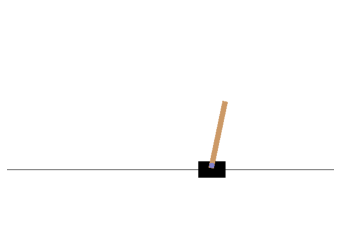

In [15]:
watch_agent(agentPG, env)